# Steps:
1.import the necessary libraries

2.import the dataset

3.Handling null values

4.outlier detection

5.Seperate Dependent and independent variables

6.Encoding

7.splitting into training and testing set

8.Feature scaling


## Importing neccesary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Importing dataset

In [2]:
df=pd.read_csv("C:/Users/91964/Documents/smart internz/Titanic-Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Handling null values

#### Dropping the irrelevant columns

In [7]:
df.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
## Visualizing null values

<AxesSubplot: >

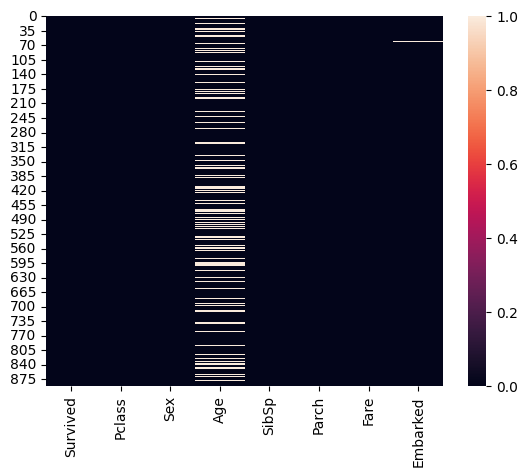

In [11]:
sns.heatmap(df.isnull())

In [12]:
df["Age"].fillna(df["Age"].mean())
df["Embarked"].fillna(df["Embarked"].mode())

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Outlier Analysis

<AxesSubplot: >

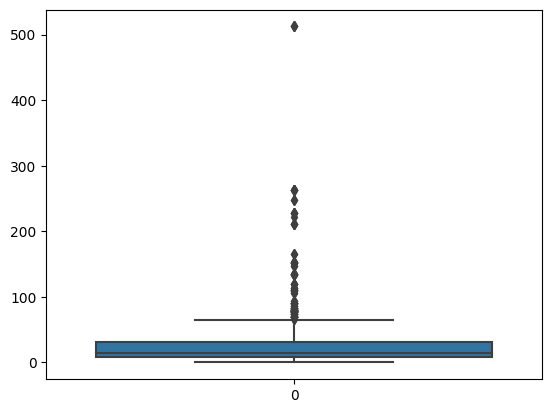

In [14]:
sns.boxplot(df["Fare"])

In [15]:
q1=df["Fare"].quantile(0.25)
q3=df["Fare"].quantile(0.75)

In [16]:
q3

31.0

In [17]:
IQR=q3-q1

In [18]:
ul=q3+1.5*IQR
ul

65.6344

In [19]:
df.median()

Survived     0.0000
Pclass       3.0000
Age         28.0000
SibSp        0.0000
Parch        0.0000
Fare        14.4542
dtype: float64

In [20]:
df["Fare"]=np.where(df["Fare"]>ul,df["Fare"].mean(),df["Fare"])

<AxesSubplot: >

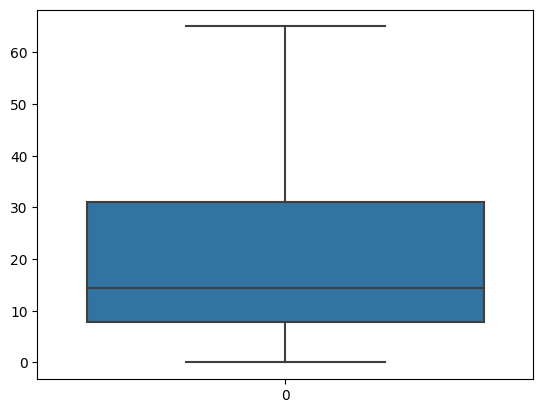

In [21]:
sns.boxplot(df["Fare"])

In [22]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.250000,S
1,1,1,female,38.0,1,0,32.204208,C
2,1,3,female,26.0,0,0,7.925000,S
3,1,1,female,35.0,1,0,53.100000,S
4,0,3,male,35.0,0,0,8.050000,S


## Independent and dependent variables

In [23]:
x=df.drop(["Survived"],axis=1)
y=df["Survived"]

## Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le=LabelEncoder()

In [26]:
x["Sex"]=le.fit_transform(df["Sex"])
x["Embarked"]=le.fit_transform(df["Embarked"])

In [27]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.250000,2
1,1,0,38.0,1,0,32.204208,0
2,3,0,26.0,0,0,7.925000,2
3,1,0,35.0,1,0,53.100000,2
4,3,1,35.0,0,0,8.050000,2


## Splitting into training and testing data

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [29]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((712, 7), (179, 7), (712,), (179,))

## Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [31]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [32]:
x_train

array([[ 0.81925059, -1.37207547,         nan, ...,  1.95926403,
        -0.33143665, -1.97652773],
       [-0.38096838,  0.72882288,  0.0859096 , ..., -0.47741019,
        -0.6793562 ,  0.57290659],
       [-0.38096838,  0.72882288,  0.0859096 , ...,  0.74092692,
         1.26369434, -1.97652773],
       ...,
       [ 0.81925059,  0.72882288,         nan, ..., -0.47741019,
        -0.88218586, -0.70181057],
       [ 0.81925059, -1.37207547,  0.42822906, ..., -0.47741019,
        -0.17351   ,  0.57290659],
       [-0.38096838,  0.72882288,  2.0713625 , ...,  0.74092692,
         1.41000852,  0.57290659]])